<a href="https://colab.research.google.com/github/GoPlusUltra/Airbnb-2019-dataset-EDA/blob/main/EDA_on_Airbnb_2019_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WHAT IS AIRBNB?

 Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. Explore and analyze the data to discover key understandings (not limited to these) such as : What can we learn about different hosts and areas? What can we learn from predictions? (ex: locations, prices, reviews, etc) Which hosts are the busiest and why? Is there any noticeable difference of traffic among different areas and what could be the reason for it?

[2]
0s


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
%lsmagic 

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

In [3]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df= pd.read_csv('/content/drive/MyDrive/Airbnb_data.csv')

Understanding the data available in dataset.

steps
1. understand the data.
2. ask right questions
3. find how to work on each questions
4. find effective diff ways to showcase the findings.
5. Present the notebook in cleanest way.
6. At last add conclusions.


In [5]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We almost got all the data, thats good.

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
len(df['name'].unique()) # As name column has too many unique entries we can drop it.

47906

In [11]:
df.last_review.tail(5)   #We can do something with this data in additional task.

48890    NaN
48891    NaN
48892    NaN
48893    NaN
48894    NaN
Name: last_review, dtype: object

We would like to keep original dataframe as it is. In case we get some idea to do with dropped columns, we will use it. For now we are DROPPING name and last review column.

In [12]:
new_df = df[['id','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','latitude', 'longitude',
             'number_of_reviews','calculated_host_listings_count','availability_365']]

# when the min no of nights are max study the visits at those hosts. --- use describe function, neglect outliers and plot graphs


In [13]:
min_nights=new_df[new_df['minimum_nights']<50].groupby(['room_type'])['minimum_nights']

In [14]:
min_nights.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25110.0,6.898288,9.441879,1.0,2.0,3.0,5.0,47.0
Private room,22170.0,4.480469,6.981433,1.0,1.0,2.0,4.0,47.0
Shared room,1148.0,4.808362,8.223122,1.0,1.0,1.0,3.0,35.0


In [ ]:
min_nights[['room_type']=='Entire home/apt']

Thus we can see minimum nights for each type is different and there are outliers which we need to remove. Considering the 75 percentile of data lets remove outliers above 50 days. and plot some graphs.

In [ ]:
new_df['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [ ]:
new_df.head(10)

In [ ]:
# Calculating avg room price for all 3 types of room in diff neighburhood areas
avg_room_price=df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()


Text(0.5, 1.0, 'Mean prices of room types by different Neighbourhood')

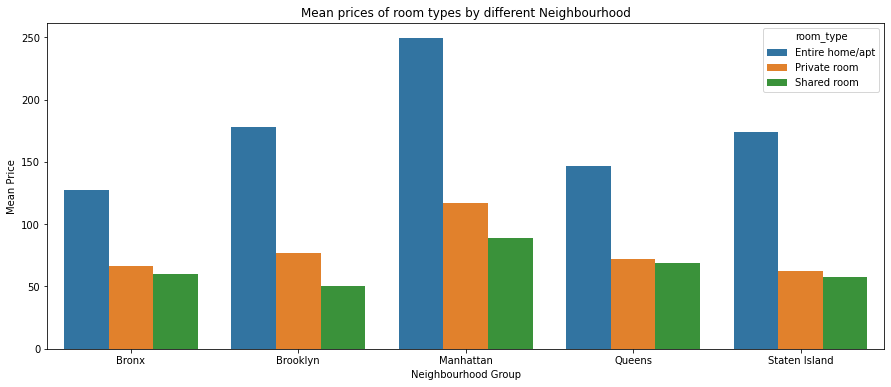

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=avg_room_price['neighbourhood_group'], y=avg_room_price['price'], hue=avg_room_price['room_type'], data=avg_room_price)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Mean Price')
plt.title('Mean prices of room types by different Neighbourhood')



# Which neighbourhood group is most famous??

In [ ]:
new_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

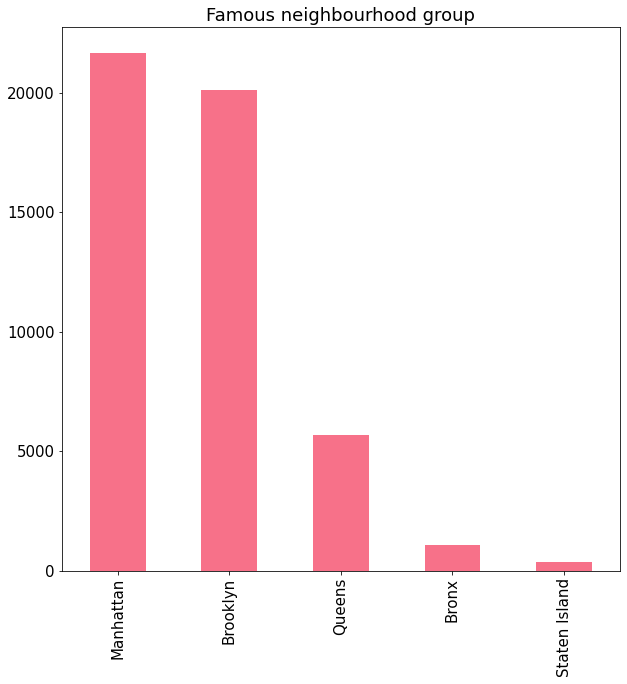

In [ ]:
new_df['neighbourhood_group'].value_counts().plot(kind='bar',
                                    figsize=(10,10),
                                    title="Famous neighbourhood group")
plt.rcParams.update({'font.size': 15})

# Which Room Type has maximum booking??

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a14779550>],
      dtype=object)

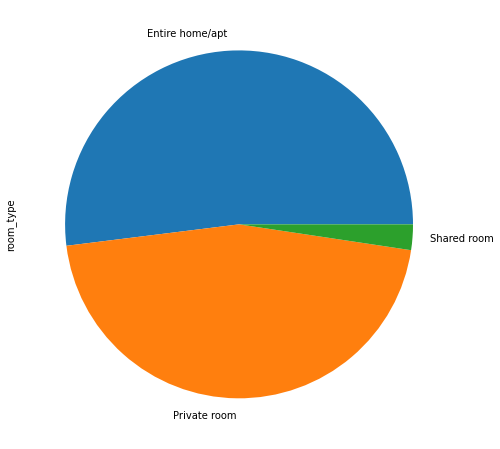

In [ ]:
new_df['room_type'].value_counts().plot(kind='pie', subplots=True, figsize=(8, 8))  # add percentage, explode view

In [ ]:
availability=new_df.groupby(['availability_365'])['availability_365'].count()  
availability

availability_365
0      17533
1        408
2        270
3        306
4        233
       ...  
361      111
362      166
363      239
364      491
365     1295
Name: availability_365, Length: 366, dtype: int64

case study
1. **when the min no of nights are max study the visits at those hosts.**  Graph pending
2. use foilum to plot the markers on graph.
3. **which room type has maximum bookings.** Attractive UI pending
4. **avg price of all room types by neighbourhood.** DONE
5. which neibhourhood is most famous
6. Most no of customer attending hosts.
7. **Most famous neighbourhood_group**

availability_365 column is of no use

<Figure size 1080x1440 with 0 Axes>

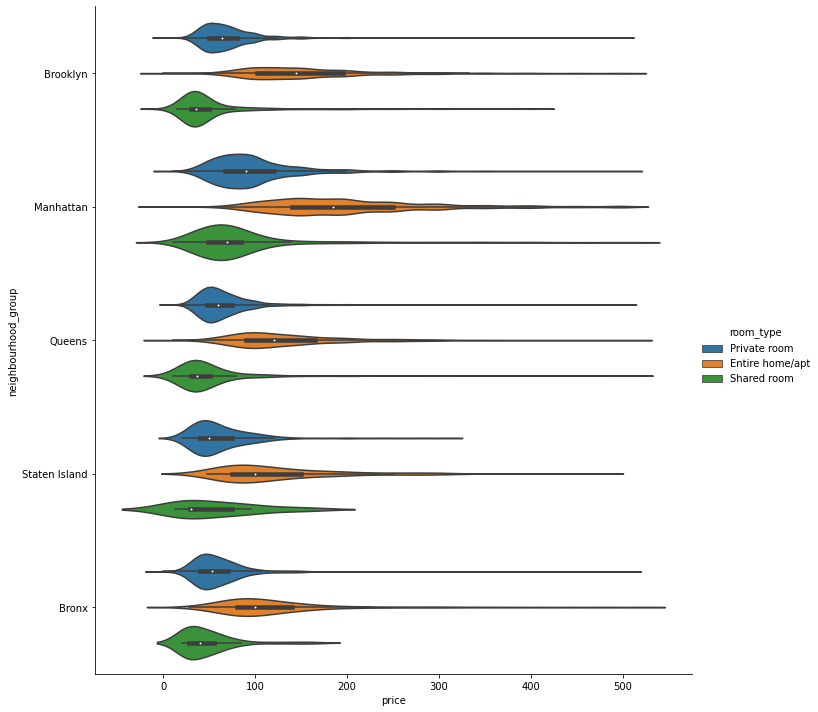

In [42]:
plt.figure(figsize=(15,20))
sns.catplot(x="price", y="neighbourhood_group", hue="room_type", data=new_df[new_df['price'] <= 500], kind='violin',height=10)
#sns.violinplot(x="room_type", y="price", data=new_df[new_df['price'] <= 700])    # try to plot this for each neighbourhood using for loop.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

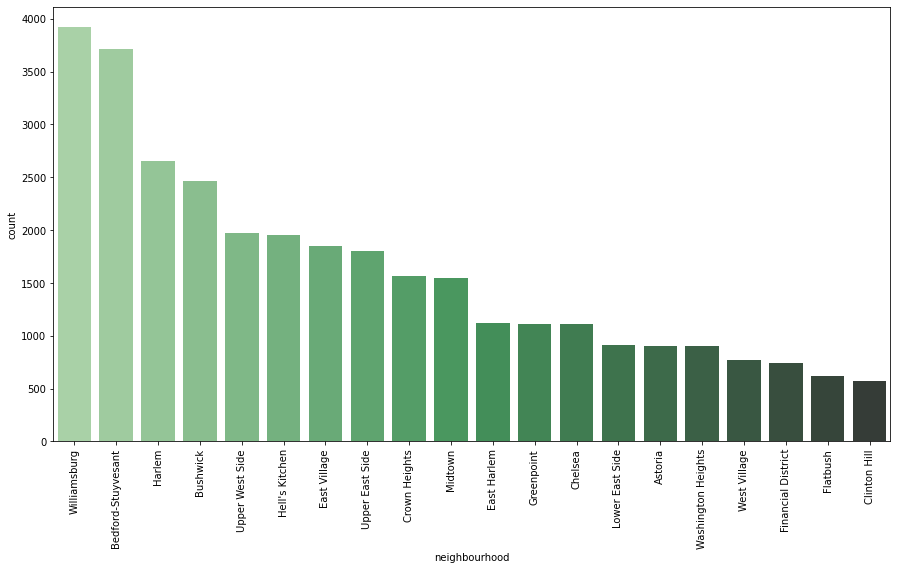

In [44]:
plt.figure(figsize=(15,8))
sns.countplot(x="neighbourhood", data=new_df, palette="Greens_d",
              order=new_df.neighbourhood.value_counts().iloc[:20].index)
plt.xticks(rotation=90)
#sns.countplot(new_df, order=new_df['neighbourhood'].value_counts().iloc[:10].index)

#sns.countplot(x='neighbourhood',data=new_df)
# x axis neighbourhood with hue and y axis value counts with mean price.

#new_df['neighbourhood'].value_counts()

In [ ]:
hosts_areas = new_df.groupby(['host_id','host_name','room_type','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

,host_id,host_name,room_type,neighbourhood_group,calculated_host_listings_count
36134,219517861,Sonder (NYC),Private room,Manhattan,327
36133,219517861,Sonder (NYC),Entire home/apt,Manhattan,327
30654,107434423,Blueground,Entire home/apt,Manhattan,232
30653,107434423,Blueground,Entire home/apt,Brooklyn,232
20447,30283594,Kara,Entire home/apt,Manhattan,121


In [ ]:
top_hosts= new_df.groupby(['host_name','room_type'])['calculated_host_listings_count'].count()
top_hosts.head(20)

host_name                 room_type      
'Cil                      Private room       1
(Ari) HENRY LEE           Entire home/apt    1
(Email hidden by Airbnb)  Entire home/apt    3
                          Private room       3
(Mary) Haiy               Entire home/apt    1
-TheQueensCornerLot       Entire home/apt    1
0123                      Entire home/apt    1
2018Serenity              Private room       1
371                       Entire home/apt    1
475                       Private room       4
5 Star Stays              Entire home/apt    1
@ Art House Monique       Entire home/apt    2
                          Private room       2
A                         Entire home/apt    5
                          Private room       5
A & H                     Entire home/apt    1
A Tree Grows In Brooklyn  Private room       1
A-B                       Entire home/apt    1
A. Kaylee                 Entire home/apt    3
A. Nicholas               Private room       4
Name: calculated_h

In [ ]:
hosts_areas = new_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


AS WE CAN SEE MOST NUMBER OF LISTINGS ARE FROM MANHATTAN CREATED SONDER (NYC), BLUEGROUND,MICHAEL , DAVID


What can we learn from predictions? (ex: locations, prices, reviews, etc)
☹


In [ ]:
areas_reviews = new_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


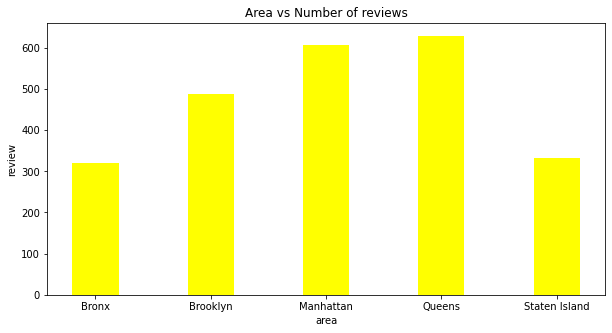

In [ ]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='yellow',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [ ]:
price_area = new_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


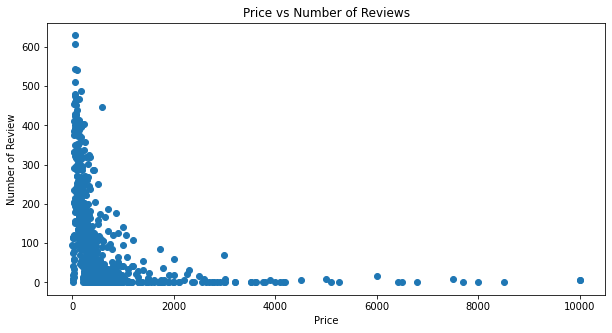

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

From the above Analysis we can say that most people prefer to stay in place where price is less.


Which hosts are the busiest and why?

In [ ]:
busiest_hosts = new_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews',ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


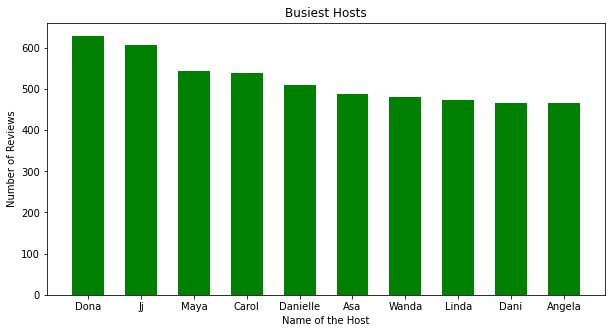

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='green',
        width = 0.6)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

BUSSIEST HOSTS ARE 
1)DONA
2)JI
3)MARIA
4)CAROL
5)DANIELLENE
REASON: BECAUSE THESE HOSTS LISTED ROOM TYPE AS ENTIRE HOME AND PRIVATE ROOM WHICH IS PREFFERED BY MOST OF THE PEOPLE 

IS THERE ANY DIFFERNCE WHICH CAN NOTICED I.E TRAFFIC AMONG THE AREAS AND WHICH COULD BE REASON FOR IT?

In [ ]:
traffic_areas = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


###From the Above Analysis We can Stay that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.

CONCLUSION
1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.
2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
3. Most people prefer to pay less price.
4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
5. If people are not staying more then one night means they are travellers.
Thanks

In [ ]:
THANK YOU

In [ ]:
#sns.displot(data=avg_room_price, x="neighbourhood_group", hue="room_type", multiple="price")


In [ ]:
things pending

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
n = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
for i in range(0,100):
  folium.Marker(location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']] ).add_to(n)
n